# Tensorflow visualiazation tools tutorial

## NewDream

This method is based on blog avalaible on https://distill.pub/2017/feature-visualization/

We will be using tensornets to create our model and OpenCV to load our images.

In [1]:
import tensorflow as tf
import tensornets as nets
import cv2
import visualization.new_dream as new_dream

We need to set the size of generated images.

In [2]:
size = 224
input_t, decorrelated_image_t, coeffs_t = new_dream.setup(size)

We create our model with input_t. Model variable in this case represents logits layer of our model but we don't need it in this case. Even if we wanted to visualize individual classes it is better to use layer before logits, otherwise we will get very distorted output, because it is often easier to just minimize other classes instead of optimizing one.

We can use other convolutional models from tensornets such as ResNet or VGG. Only problem is that we need to know names of tensors we need to optimize.

In [3]:
model = nets.Inception1(input_t)

graph = tf.get_default_graph()

sess = tf.Session()

In [4]:
sess.run(model.pretrained())

We load pretrained weights for our model.

In [5]:
objective = graph.get_tensor_by_name("inception1/block3b/concat:0")

It is neccessary to choose our objective. With it we can select what neuron/layer to visualize. 

In [6]:
image = new_dream.render_image(sess, decorrelated_image_t, coeffs_t, objective[..., 55], 0.01)

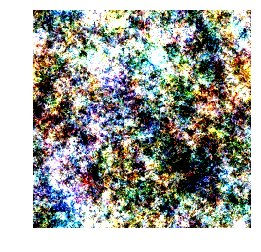

In [7]:
new_dream.show_image(new_dream.process_image(image))